<a href="https://colab.research.google.com/github/knownbymanoj/Machine_Learning/blob/main/Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

So far, we familiarized with *numpy* for optimal arrays computation, *scikit-learn* for Machine Learning tasks, and now we move on another Python library for the implementation of Neural Networks: **Keras**. \
\
Documentation: [<a href="https://keras.io/">Link</a>]. 


We start our notebook by defining a classification dataset.</br>
We use Sklearn to generate 150 samples, with two features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
print(y)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

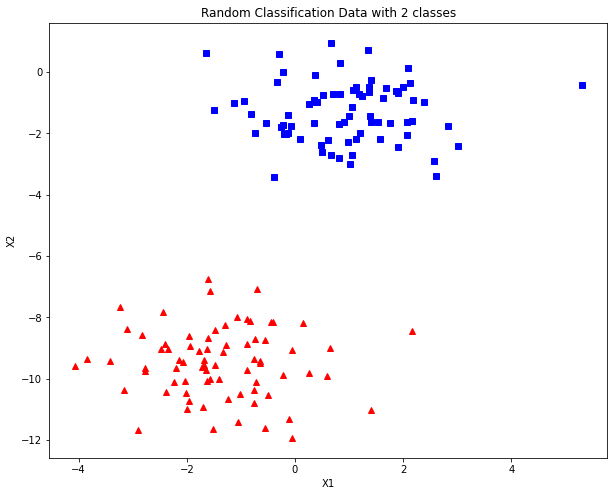

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

We now define training and testing set. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)

We are ready for the definition of a simple MultiLayer Perceptron. <br>
Let's import the required libraries. 

In [ ]:
import tensorflow #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mpdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model

When working with Neural Networks, we define some variables that describe the classification task.

In [ ]:
# Configuration options
feature_vector_length = 2 #how many features
num_classes = 2 #how many classes

Classification tasks require some preprocessing of the ground truth. <br>
In particular, we aim to define a NN where the *output layer* is equal to the number of classes of the task. <br>
\
Thus, we need to convert the ground-truth to the so called *hot encoding*. 
For example, suppose that we have $y = [cat, dog, cat, cat]$, we assign the vector $cat = [1, 0]$, and $dog = [0, 1]$. \
\
With this conversion strategy, we obtain the following:
$y = [[1, 0], [0, 1], [1, 0], [1, 0]]$.

In [ ]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
print(y_train[:5])
print(y_train_cat[:5])

[0 1 0 1 1]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


It's time to build our MLP! /
We use a <a href="https://keras.io/guides/sequential_model/"> Sequential </a> model based on <a href="https://keras.io/api/layers/core_layers/dense/"> Dense </a> layers. 
We create a MLP with the following layers:


1.   input = 2 (the number of features), neurons = 2, activation function = relu;
2.   input = 2 (the number of neurons of the prev. layer), neurons = 2 (the number of classes), activation function = softmax.

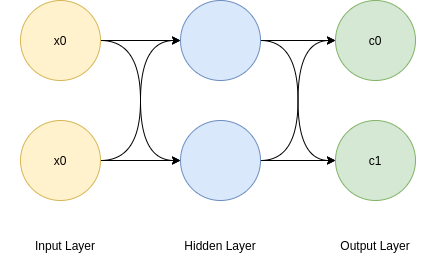



In [ ]:
# Create the model
model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model.add(Dense(num_classes, activation='softmax')) #output layer

We can visualize the model we just created.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


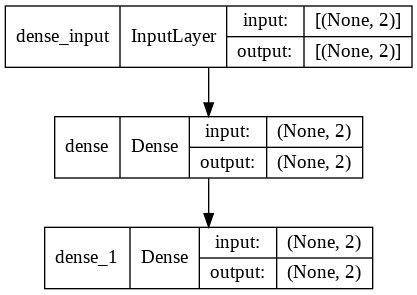

In [ ]:
plot_model(model, show_shapes= True)

In [ ]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

In [ ]:
#train our model
model.fit(X_train, y_train_cat, epochs=5, batch_size=16, verbose=1, validation_split=0.25)

Epoch 1/5
6/6 [==============================] - 1s 46ms/step - loss: 1.1501 - accuracy: 0.5333 - val_loss: 0.7950 - val_accuracy: 0.5333
Epoch 2/5
6/6 [==============================] - 0s 6ms/step - loss: 0.8895 - accuracy: 0.5333 - val_loss: 0.6147 - val_accuracy: 0.5667
Epoch 3/5
6/6 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5333 - val_loss: 0.4926 - val_accuracy: 0.5667
Epoch 4/5
6/6 [==============================] - 0s 7ms/step - loss: 0.5521 - accuracy: 0.5556 - val_loss: 0.4159 - val_accuracy: 0.6333
Epoch 5/5
6/6 [==============================] - 0s 6ms/step - loss: 0.4628 - accuracy: 0.6778 - val_loss: 0.3670 - val_accuracy: 0.7333


In [ ]:
#see the testing performance
test_results = model.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

1/1 [==============================] - 0s 21ms/step - loss: 0.4480 - accuracy: 0.6333
Test results - Loss: 0.4479985535144806 - Accuracy: 0.6333333253860474%


# Exercise

We now provide you a new dataset. 
Do the following:

1.   Create a training and testing sets (80% / 20% ratios).
2.   Do the required preprocessing for classification tasks (e.g., ground truth categorization).
3.   Create *m1*, a MultiLayerPerceptron with an input (#neurons = #features) and an output layer. Use relu as activation for the input layer, while the softmax for the output. See Figure 1.
4.   Create *m2*, a MultiLayerPerceptron with an input (#neurons = #features), one hidden (#neurons = 6), and an output layer. Use relu as activation for the input and hidden layers, while the softmax for the output.
5.   Train both *m1* and *m2*. Use 5 epochs, and a batch size = 8. In the training, use the Keras validation split = 0.1.
6.   Pick the best model between *m1* and *m2* using the best validation score. Use such a model and compute the accuracy on the test set.

Expected outcome: 
    
    Test results - Loss: 1.09537672996521 - Accuracy: 0.3611111044883728%
    
NOTE: you might have slightly different results. 


*Model 1* architecture.

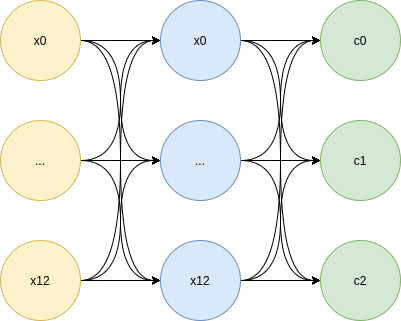

*Model 2* architecture.

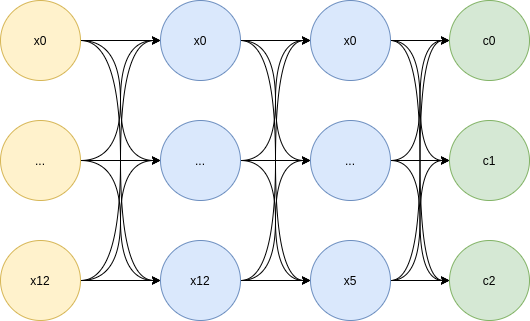

In [ ]:
#load the dataset
from sklearn.datasets import load_wine #load our target dataset

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

In [ ]:
#P1. Create a training and testing sets (80% / 20% ratios).
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print(len(X), len(X_train), len(X_test))

178 142 36


In [ ]:
#P2. Do the required preprocessing for classification tasks (e.g., ground truth categorization).

#see the number of labels
labels = set(y_train)
print(labels, len(labels))

# Configuration options
feature_vector_length = X.shape[1] #how many features
num_classes = len(labels) #how many classes

print(f"# Features: {feature_vector_length}\t# Classes: {num_classes}")

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

{0, 1, 2} 3
# Features: 13	# Classes: 3


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 3)                 42        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________
None


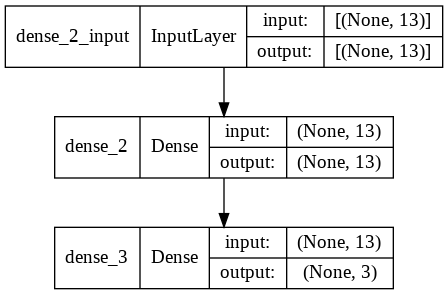

In [ ]:
# P3. Create m1, a MultiLayerPerceptron with an input and an output layer. Use relu as activation for the input layer (#neurons = #features), while the softmax for the output.
# Create the model
model1 = Sequential() #we first define how the "model" looks like
model1.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model1.add(Dense(num_classes, activation='softmax')) #output layer
print(model1.summary())
plot_model(model1, show_shapes= True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 6)                 84        
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________
None


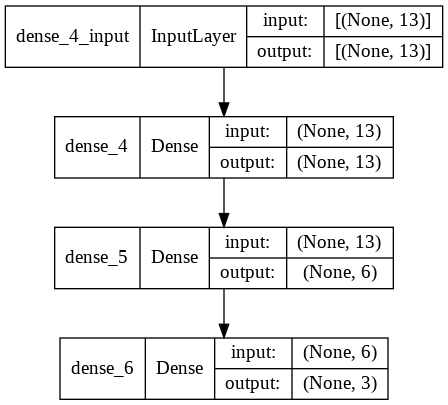

In [ ]:
# P4. Create m2, a MultiLayerPerceptron with an input (#neurons = #features), one hidden (#neurons = 6), and an output layer. Use relu as activation for the input and hidden layers, while the softmax for the output.

model2 = Sequential() #we first define how the "model" looks like
model2.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model2.add(Dense(units=6 , activation='relu')) #input layer
model2.add(Dense(num_classes, activation='softmax')) #output layer
print(model2.summary())
plot_model(model2, show_shapes= True)

In [ ]:
# P5. Train both m1 and m2. Use 5 epochs, and a batch size = 8. In the training, use the Keras validation split = 0.1.
# PART 1

# Configure the model and start training
model1.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
model1.fit(X_train, y_train_cat, epochs=5, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/5
16/16 [==============================] - 1s 16ms/step - loss: 8.3181 - accuracy: 0.3386 - val_loss: 1.0957 - val_accuracy: 0.4667
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 1.0977 - accuracy: 0.3780 - val_loss: 1.0958 - val_accuracy: 0.4667
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3780 - val_loss: 1.0959 - val_accuracy: 0.4667
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.3780 - val_loss: 1.0961 - val_accuracy: 0.4667
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3780 - val_loss: 1.0964 - val_accuracy: 0.4667


In [ ]:
# PART 2

# Configure the model and start training
model2.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
model2.fit(X_train, y_train_cat, epochs=5, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/5
16/16 [==============================] - 1s 15ms/step - loss: 71.4308 - accuracy: 0.3701 - val_loss: 1.1002 - val_accuracy: 0.2000
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3622 - val_loss: 1.1001 - val_accuracy: 0.2000
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3701 - val_loss: 1.1000 - val_accuracy: 0.2000
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 1.0948 - accuracy: 0.3701 - val_loss: 1.1000 - val_accuracy: 0.2000
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 1.0936 - accuracy: 0.3701 - val_loss: 1.1002 - val_accuracy: 0.2000


In [ ]:
# P6. Pick the best model between m1 and m2 using the best validation score. Use such a model and compute the accuracy on the test set.

#both models have a comparable valdation. At the 5th epoch, m1 and m2 validation = 0.2667.
#in these cases, we pick the "lightest" model, i.e., the less complex (e.g., less trainable parameters).
#see the testing performance
test_results = model1.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

2/2 [==============================] - 0s 6ms/step - loss: 1.0950 - accuracy: 0.4444
Test results - Loss: 1.0950249433517456 - Accuracy: 0.4444444477558136%
